# Flight data project

## In this project I will be analysing a dataset of airplane crashes from 1908 up to 2009.

### My aim will be to see which airline operators have been involved in the most accidents, and to see if air travel is getting safer.

#### I will start off my importing the libraries below as I will need them to make my analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

#### Below reads in the dataframe using pandas and displays the first 5 rows.

In [2]:
# Read in the data set and allow us to read time.
data = pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908.csv',parse_dates=['Date'])

In [142]:
data.head()  #Print first rows so we can visualise the contents of the dataframe.

,Date,Time,Location,Operator,Route,Type,Registration,Aboard,Fatalities
0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,NaN,2.0,1.0
1,1912-07-12,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,Test flight,Dirigible,NaN,5.0,5.0
2,1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,NaN,Curtiss seaplane,NaN,1.0,1.0
3,1913-09-09,18:30,Over the North Sea,Military - German Navy,NaN,Zeppelin L-1 (airship),NaN,20.0,14.0
4,1913-10-17,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,Zeppelin L-2 (airship),NaN,30.0,30.0


## Data cleaning

#### The data frame contains some un-needed columns so I will remove them. 

#### Since I will be focusing my analysis on the number of crashes and deaths, I will remove all rows containing missing information on number of passengers aboard and number of fatalities

In [4]:
#Clean the data
data = data[data['Aboard'].isnull()==False] # Remove all rows which doesn't list number of passengers

data = data[data['Fatalities'].isnull()==False] # Remove all rows which doesn't list number of passenger fatalities

data = data[data['Date'].isnull()==False] # Remove all rows which don't have a date

data = data.drop(['Summary','Ground','cn/In','Flight #'],axis=1) # Drop these unnessary columns as I won't be analysing them

In [5]:
data.head() # Our new dataframe

,Date,Time,Location,Operator,Route,Type,Registration,Aboard,Fatalities
0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,NaN,2.0,1.0
1,1912-07-12,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,Test flight,Dirigible,NaN,5.0,5.0
2,1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,NaN,Curtiss seaplane,NaN,1.0,1.0
3,1913-09-09,18:30,Over the North Sea,Military - German Navy,NaN,Zeppelin L-1 (airship),NaN,20.0,14.0
4,1913-10-17,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,Zeppelin L-2 (airship),NaN,30.0,30.0


## I'm going to start off by analysing the most lethal commerical airline operators.

#### I'll start of by creating a new datafram using only the Operator, Aboard and Fatalities columns.
#### I will then remove all airline operators which contain the word "Military".
#### I will group the dataframe by airline operator and give a count of the number of crashes and total sum of fatalities. 
#### Finally I will create two new columns to give us an idea of the percentage of crashes and fatalities caused by each operator.

In [6]:
data2 = data.loc[:,['Operator','Aboard','Fatalities']] # Create a new dataframe with operators, aboard passengers and fatalities.

data2 = data2[data2['Operator'].str.contains('Military')==False] # Only interested in commercial flights for now so remove all military operators.

data2 = data2.groupby(['Operator']).agg(['count','sum']) # Group by airline, giving count and sum of passengers aboard and fatalities.

data2 = data2[data2['Aboard','count'] > 5] # Remove airlines with less than 5 crashes 

data2['Proportion of Crashes'] = data2['Fatalities','count']/data2['Fatalities','count'].sum() # Create new column giving proportion of crashes by each airline.

data2['Proportion of Fatalities'] = data2['Fatalities','sum']/data2['Fatalities','sum'].sum() # Create new column giving proportion of crashes by each airline.

In [7]:
data2.head(10)

Aboard         Fatalities         Proportion of Crashes  \
                       count     sum      count     sum                         
Operator                                                                        
AVIANCA                   24  1067.0         24   941.0              0.014027   
Aeroflot                 179  8870.0        179  7156.0              0.104617   
Aerolineas Argentinas     12   440.0         12   340.0              0.007013   
Aeropostale               26    59.0         26    52.0              0.015196   
Air America               11   161.0         11   116.0              0.006429   
Air Canada                 6   355.0          6   138.0              0.003507   
Air France                67  2874.0         67  1729.0              0.039158   
Air India                 10   927.0         10   827.0              0.005845   
Air Taxi                  44   176.0         44   161.0              0.025716   
Air Union                  9    21.0          9    17.0              0.005260   

                      Proportion of Fatalities  
                                                
Operator                                        
AVIANCA                               0.022510  
Aeroflot                              0.171180  
Aerolineas Argentinas                 0.008133  
Aeropostale                           0.001244  
Air America                           0.002775  
Air Canada                            0.003301  
Air France                            0.041360  
Air India                             0.019783  
Air Taxi                              0.003851  
Air Union                             0.000407

Text(0.5, 1.0, 'Total Number of Deaths by Airline Operator')

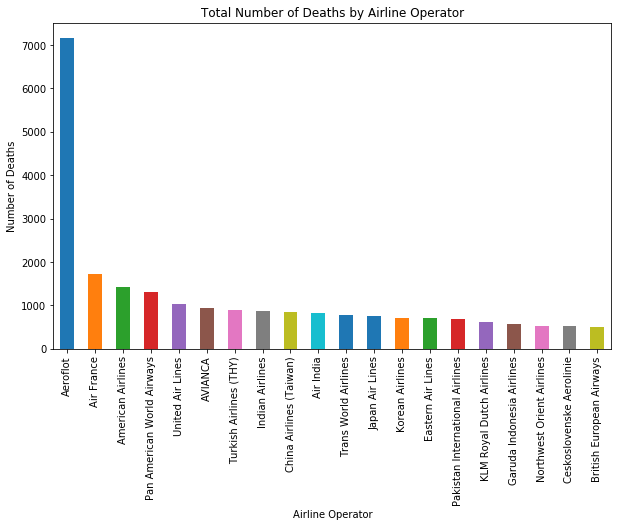

In [124]:
data2 = data2.sort_values([('Fatalities','sum')],ascending=False)

plt.figure(figsize=(10,6))
data2['Fatalities','sum'].head(20).plot(kind='bar')
plt.xlabel('Airline Operator')
plt.ylabel('Number of Deaths')
plt.title('Total Number of Deaths by Airline Operator')

Text(0.5, 1.0, 'Total Number of Crashes by Airline Operator')

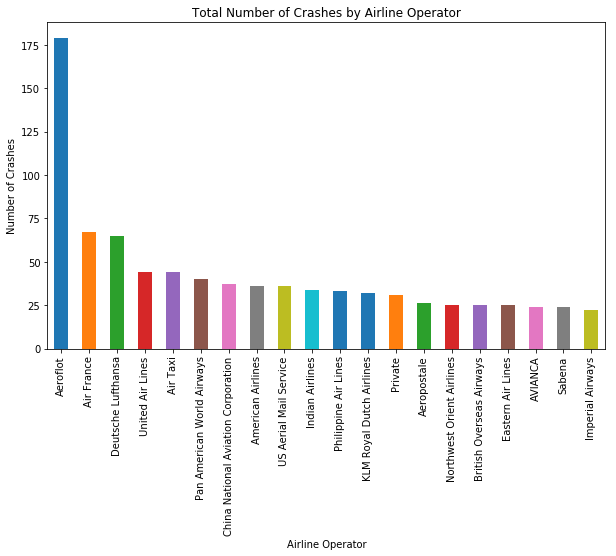

In [125]:
data2 = data2.sort_values([('Aboard','count')],ascending=False)

plt.figure(figsize=(10,6))
data2['Fatalities','count'].head(20).plot(kind='bar')
plt.xlabel('Airline Operator')
plt.ylabel('Number of Crashes')
plt.title('Total Number of Crashes by Airline Operator')

Text(0.5, 1.0, 'Proportion of Crashes by Airline Operator')

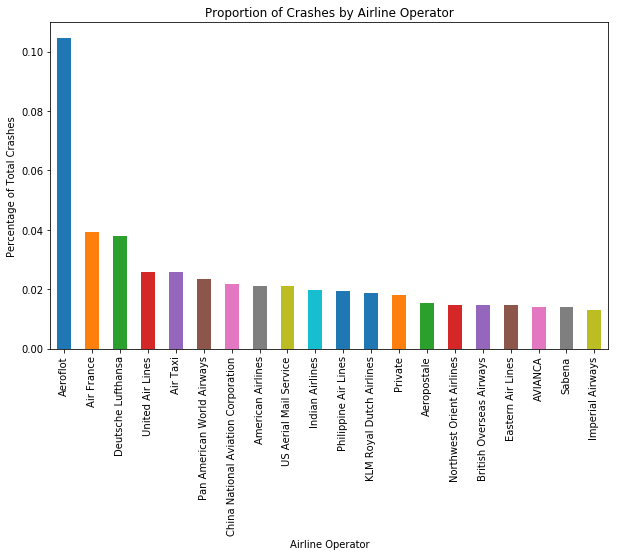

In [126]:
data2 = data2.sort_values('Proportion of Crashes',ascending=False)

plt.figure(figsize=(10,6))
data2['Proportion of Crashes'].head(20).plot(kind='bar')
plt.xlabel('Airline Operator')
plt.ylabel('Percentage of Total Crashes')
plt.title('Proportion of Crashes by Airline Operator')

Text(0.5, 1.0, 'Proportion of Fatalities by Airline Operator')

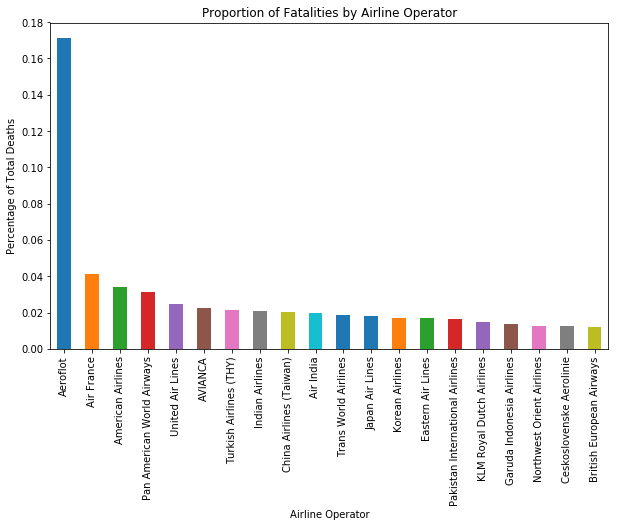

In [127]:
data2 = data2.sort_values('Proportion of Fatalities',ascending=False)

plt.figure(figsize=(10,6))
data2['Proportion of Fatalities'].head(20).plot(kind='bar')
plt.xlabel('Airline Operator')
plt.ylabel('Percentage of Total Deaths')
plt.title('Proportion of Fatalities by Airline Operator')

Text(0.5, 1.0, 'Scatter of Deaths against Crashes')

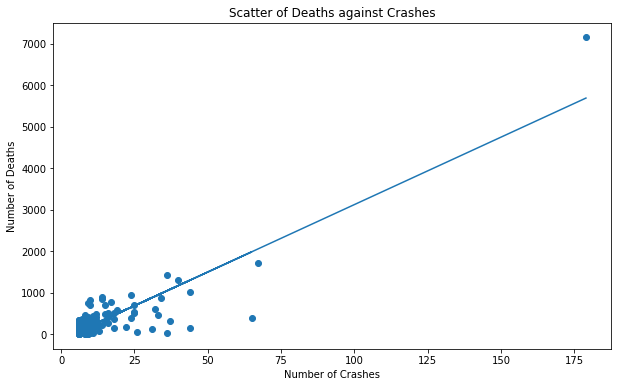

In [128]:
model = LinearRegression().fit(data2['Fatalities','count'].values.reshape(-1, 1), data2['Fatalities','sum'].values.reshape(-1, 1))

plt.figure(figsize=(10,6))
plt.scatter(data2['Fatalities','count'],data2['Fatalities','sum'])
plt.plot(data2['Fatalities','count'],model.predict(data2['Fatalities','count'].values.reshape(-1, 1)))
plt.xlabel('Number of Crashes')
plt.ylabel('Number of Deaths')
plt.title('Scatter of Deaths against Crashes')

In [12]:
chance_death = data2['Fatalities','sum'].sum()/data2['Aboard','sum'].sum() #Percentate of passengers that died in crashes.
worst_crash = data['Fatalities'].max()
print('The percentage of passengers invloved in a crash that died is '+ str(chance_death)+'. ' + 'The worst crash caused '+ str(worst_crash)+' ' + 'deaths.')

The percentage of passengers invloved in a crash that died is 0.6587145265745395. The worst crash caused 583.0 deaths.


In [129]:
#We are now going to analyse how numbers of fatalities and crashes has changed over time
WW2_start = pd.to_datetime('1941')

data3 = data

data3 = data3[data3['Operator'].str.contains('Military')==False]

data3 = data3.loc[:,['Date','Aboard','Fatalities']]

data3_1 = data3[data3['Date']<= WW2_start]

data3_1 = data3_1.groupby(data3_1['Date'].dt.year.rename('Year')).agg(['count','sum'])

data3_2 = data3[data3['Date']>= WW2_start]

data3_2 = data3_2.groupby(data3_2['Date'].dt.year.rename('Year')).agg(['count','sum'])

In [130]:
data4 = data

data4 = data4[data4['Operator'].str.contains('Military')==True]

data4 = data4.loc[:,['Date','Aboard','Fatalities']]

data4_1 = data4[data4['Date']<= WW2_start]

data4_1 = data4_1.groupby(data4_1['Date'].dt.year.rename('Year')).agg(['count','sum'])

data4_2 = data4[data4['Date']>= WW2_start]

data4_2 = data4_2.groupby(data4_2['Date'].dt.year.rename('Year')).agg(['count','sum'])

Text(0.5, 1.0, 'Plot of Number of Deaths each Year')

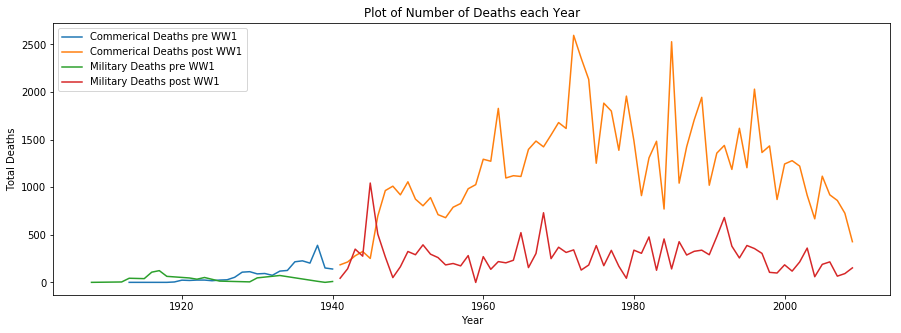

In [132]:
plt.figure(figsize=(15,5))
data3_1['Fatalities','sum'].plot(label='Commerical Deaths pre WW1')
data3_2['Fatalities','sum'].plot(label='Commerical Deaths post WW1')
data4_1['Fatalities','sum'].plot(label='Military Deaths pre WW1')
data4_2['Fatalities','sum'].plot(label='Military Deaths post WW1')
plt.legend()
plt.ylabel('Total Deaths')
plt.title('Plot of Number of Deaths each Year')

Text(0.5, 1.0, 'Plot of Number of Crashes each Year')

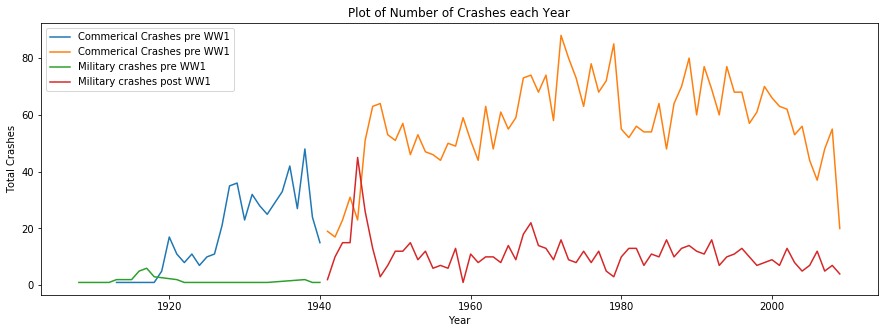

In [134]:
plt.figure(figsize=(15,5))
data3_1['Fatalities','count'].plot(label='Commerical Crashes pre WW1')
data3_2['Fatalities','count'].plot(label='Commerical Crashes pre WW1')
data4_1['Fatalities','count'].plot(label='Military crashes pre WW1')
data4_2['Fatalities','count'].plot(label='Military crashes post WW1')
plt.legend()
plt.ylabel('Total Crashes')
plt.title('Plot of Number of Crashes each Year')

In [113]:
data5 = data

data5 = data5[data5['Operator'].str.contains('Military')==False]

data5 = data.loc[:,['Type','Fatalities']]

data5 = data5.groupby(['Type']).agg(['count','sum'])

data5 = data5[data5['Fatalities','count']>5]

#data5 = data5[data5['Fatalities','count']<200]

In [114]:
data5.head()

Fatalities       
                     count    sum
Type                             
Antonov 12BP             6   31.0
Antonov AN-12           19  468.0
Antonov AN-12BP          8  251.0
Antonov AN-24           19  664.0
Antonov AN-24B          12  305.0

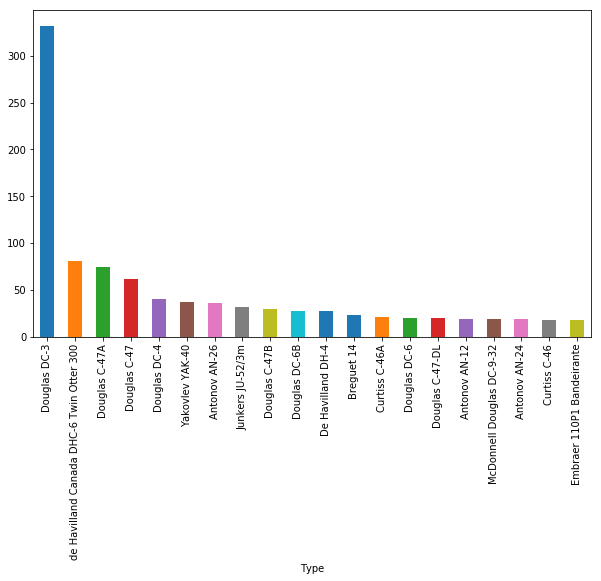

In [135]:
data5 = data5.sort_values([('Fatalities','count')],ascending=False)

plt.figure(figsize=(10,6))
data5['Fatalities','count'].head(20).plot(kind='bar')

Text(0.5, 1.0, 'Scatter of Deaths against Crashes for each Type of Plane')

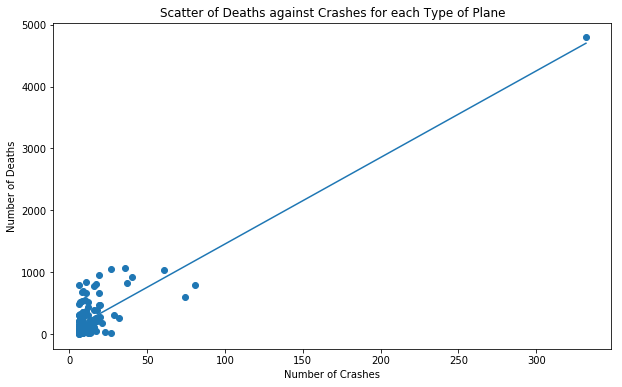

In [136]:
plt.figure(figsize=(10,6))
model2 = LinearRegression().fit(data5['Fatalities','count'].values.reshape(-1,1), data5['Fatalities','sum'].values.reshape(-1,1))
plt.scatter(data5['Fatalities','count'],data5['Fatalities','sum'])
plt.plot(data5['Fatalities','count'], model2.predict(data5['Fatalities','count'].values.reshape(-1,1)))

plt.xlabel('Number of Crashes')
plt.ylabel('Number of Deaths')
plt.title('Scatter of Deaths against Crashes for each Type of Plane')

In [117]:
data6 = data

data6 = data6[data6['Operator'].str.contains('Military')==False]

data6 = data.loc[:,['Type','Fatalities']]

data6 = data6.groupby(['Type']).agg(['count','sum'])

data6 = data6[data6['Fatalities','count']>5]

data6 = data6[data6['Fatalities','count']<200]

Text(0.5, 1.0, 'Scatter of Deaths against Crashes for each Type of Plane')

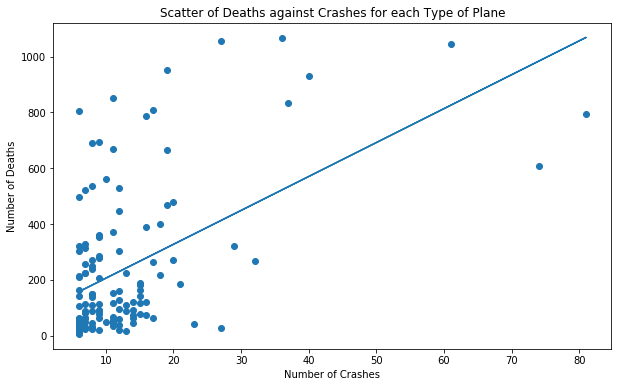

In [137]:
plt.figure(figsize=(10,6))
model3 = LinearRegression().fit(data6['Fatalities','count'].values.reshape(-1,1), data6['Fatalities','sum'].values.reshape(-1,1))
plt.scatter(data6['Fatalities','count'], data6['Fatalities','sum'])
plt.plot(data6['Fatalities','count'], model3.predict(data6['Fatalities','count'].values.reshape(-1,1)))

plt.xlabel('Number of Crashes')
plt.ylabel('Number of Deaths')
plt.title('Scatter of Deaths against Crashes for each Type of Plane')